In [352]:
# Juntar los excel


In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [354]:
df_air = pd.read_csv("air_quality_gijon.csv")

df_meteo = pd.read_csv("meteo_gijon.csv")

df_movility = pd.read_csv("movility_gijon.csv")




In [355]:
df_air.head(50)

# Eliminamos una columna repetida en calidad del aire
df_air.drop("NO2_OesteAvdaArgentina.1", axis=1, inplace=True)
df_air.drop("NO_EsteAvdaCastilla", axis=1, inplace=True)

# Eliminamos las columnas de Avenida Castilla y Argentina
df_air.drop("SO2_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("SO2_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("NO2_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("NO2_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("CO_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("CO_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("PM10_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("PM10_EsteAvdaCastilla", axis=1, inplace=True)
df_air.drop("O3_OesteAvdaArgentina", axis=1, inplace=True)
df_air.drop("O3_EsteAvdaCastilla", axis=1, inplace=True)



df_air.head(10)

df_air.columns

# Renombrar las columnas eliminando 'GijonGlobal'
nuevos_nombres = {col: col.replace('_GijonGlobal', '') for col in df_air.columns}
df_air = df_air.rename(columns=nuevos_nombres)


df_air.head()


,date,SO2,NO,NO2,CO,PM10,O3
0,2023-12-18,14.0,141.0,73.0,0.86,164.0,72.0
1,2021-12-13,26.0,239.0,75.0,6.45,199.0,38.0
2,2022-10-13,21.0,43.0,42.0,2.16,70.0,58.0
3,2019-07-29,26.0,57.0,31.0,3.87,86.0,71.0
4,2021-11-26,19.0,44.0,67.0,3.02,77.0,76.0


In [356]:
df_meteo.head()

df_meteo.columns = df_meteo.columns.str.replace('_Gijon', '')

df_meteo.drop(columns=['velmediaCampus'], inplace=True)
df_meteo.drop(columns=['rachaCampus'], inplace=True)


df_meteo.head()



,date,tmed,prec,sol,presMin,presMax,dir,velmedia,racha
0,2020-06-03,18.666667,7.466667,5.533333,1000.950000,1005.050000,30.0,3.05,9.85
1,2022-11-14,13.633333,1.833333,3.350000,1001.533333,1011.000000,27.5,2.35,12.05
2,2021-03-26,12.566667,1.066667,5.250000,1014.833333,1023.133333,32.0,3.50,11.40
3,2023-12-07,12.900000,12.700000,0.000000,999.550000,1007.100000,27.0,2.80,22.80
4,2020-01-30,13.633333,1.100000,0.433333,1008.533333,1013.033333,30.5,1.80,7.10


In [357]:
#df_movility.head()

df_movility.head()

df_movility.columns

# Renombrar todas las columnas con el formato especificado
nuevos_nombres = {col: col.split('_')[1] for col in df_movility.columns if '_' in col}
df_movility = df_movility.rename(columns=nuevos_nombres)


df_movility.head()


,date,BibioArenaMestas,CentroPlaya,CentroLlano,LaviadaPoligono,CotoViesques,LlanoPumarin,LlanoMontevil,NuevoGijonBrana,LaCalzada,ContruecesGijonSurRoces,NatahoyoMoredaTremañes,Ceares
0,2022-05-09,4027.5,3175.0,3135.0,4031.0,3107.0,2020.0,3297.0,2900.5,3120.0,2140.0,2756.0,5599.0
1,2022-08-24,3363.0,3536.0,3143.0,3956.5,2571.0,1928.5,2969.0,2361.0,2502.0,2086.5,2836.0,5274.0
2,2022-02-15,3720.5,3199.0,2972.0,4014.0,3359.0,2080.5,2574.0,3004.0,3249.0,2359.0,2216.5,5670.5
3,2021-08-26,3829.0,3788.5,3261.0,4348.0,2700.0,1930.0,2324.0,2711.5,3122.0,2356.0,2623.5,5592.5
4,2022-01-28,823.0,719.0,672.0,911.0,852.0,471.0,698.0,699.0,784.0,578.0,680.0,1321.5


In [358]:
# Unir por date
df_movility_air = pd.merge(df_movility, df_air, on='date', how='outer')
df_meteoo_air = pd.merge(df_meteo, df_air, on='date', how='outer')

merged_df = pd.merge(df_movility, df_meteoo_air)


In [359]:
merged_df.head()

,date,BibioArenaMestas,CentroPlaya,CentroLlano,LaviadaPoligono,CotoViesques,LlanoPumarin,LlanoMontevil,NuevoGijonBrana,LaCalzada,...,presMax,dir,velmedia,racha,SO2,NO,NO2,CO,PM10,O3
0,2022-05-09,4027.5,3175.0,3135.0,4031.0,3107.0,2020.0,3297.0,2900.5,3120.0,...,1015.700000,99.0,1.65,5.70,14.0,63.0,54.0,1.86,136.0,102.0
1,2022-08-24,3363.0,3536.0,3143.0,3956.5,2571.0,1928.5,2969.0,2361.0,2502.0,...,1012.266667,65.5,1.50,6.10,4.0,11.0,26.0,0.47,43.0,51.0
2,2022-02-15,3720.5,3199.0,2972.0,4014.0,3359.0,2080.5,2574.0,3004.0,3249.0,...,1021.133333,24.5,3.75,11.25,32.0,39.0,56.0,1.90,64.0,90.0
3,2021-08-26,3829.0,3788.5,3261.0,4348.0,2700.0,1930.0,2324.0,2711.5,3122.0,...,1010.166667,7.5,3.75,9.75,4.0,48.0,41.0,0.55,47.0,90.0
4,2022-01-28,823.0,719.0,672.0,911.0,852.0,471.0,698.0,699.0,784.0,...,1031.033333,9.5,3.35,10.55,4.0,9.0,30.0,0.59,53.0,83.0


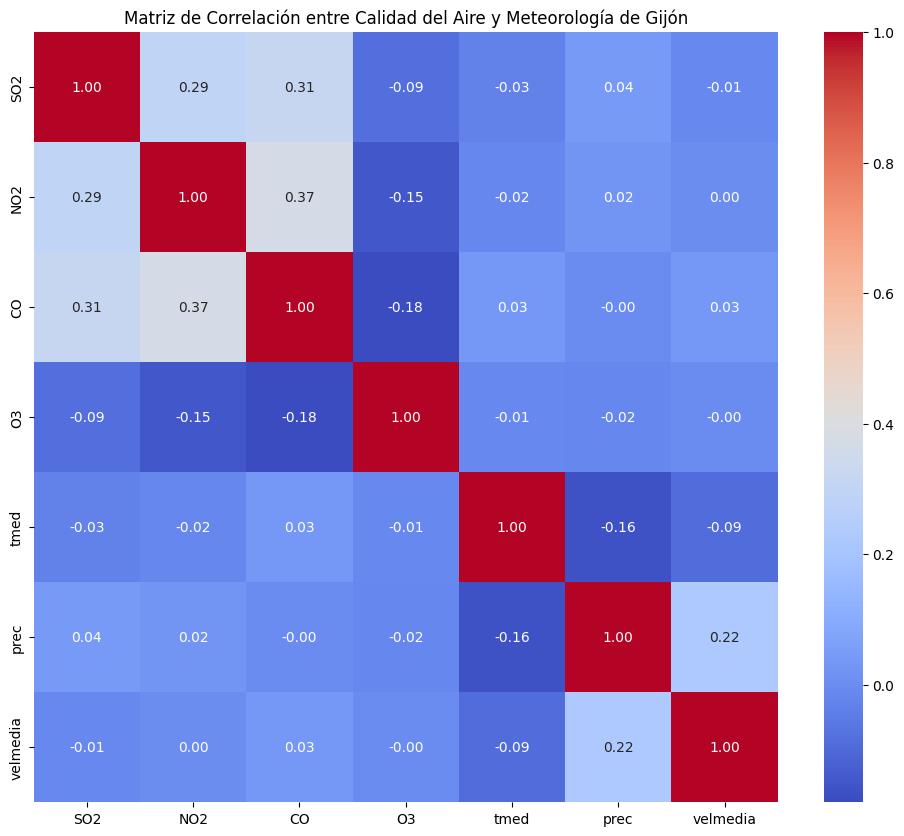

,SO2,NO2,CO,O3,tmed,prec,velmedia
0,14.0,73.0,0.86,72.0,18.666667,7.466667,3.05
1,26.0,75.0,6.45,38.0,13.633333,1.833333,2.35
2,21.0,42.0,2.16,58.0,12.566667,1.066667,3.50
3,26.0,31.0,3.87,71.0,12.900000,12.700000,2.80
4,19.0,67.0,3.02,76.0,13.633333,1.100000,1.80
5,15.0,31.0,2.48,71.0,22.233333,11.066667,2.35
6,6.0,69.0,1.42,68.0,15.833333,6.366667,1.95
7,11.0,36.0,1.04,101.0,9.400000,0.000000,2.05
8,26.0,93.0,3.84,80.0,14.266667,0.000000,1.80
9,6.0,35.0,1.19,73.0,22.033333,0.000000,3.20


In [360]:
variables_meteo = df_meteo.columns
variables_air = df_air.columns


# Crear un DataFrame combinando las variables de calidad del aire y meteorología
df_combined = pd.concat([df_air[variables_air], df_meteo[variables_meteo]], axis=1)


df_combined.drop(columns=['date'], inplace=True)

df_combined.drop(columns=['presMin', 'dir', 'presMax', 'sol', 'racha'], inplace=True)
df_combined.drop(columns=['PM10'], inplace=True)


df_combined.drop(columns=['NO'], inplace=True)



# Eliminar filas con valores vacíos
df_combined.dropna(inplace=True)

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Calidad del Aire y Meteorología de Gijón")
plt.show()



df_combined.head(50)

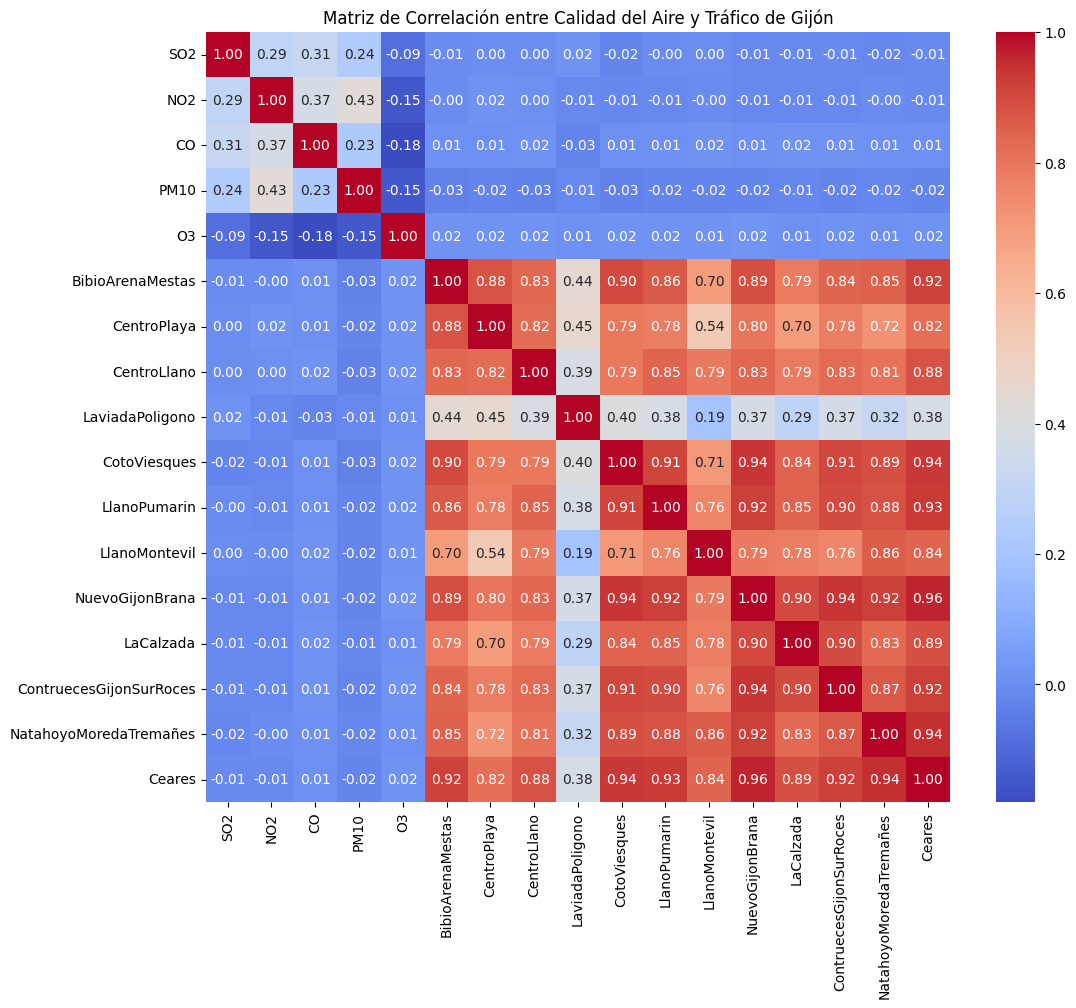

In [361]:
variables_movility = df_movility.columns
variables_air = df_air.columns


# Crear un DataFrame combinando las variables de calidad del aire y meteorología
df_combined = pd.concat([df_air[variables_air], df_movility[variables_movility]], axis=1)


df_combined.drop(columns=['date'], inplace=True)
df_combined.drop(columns=['NO'], inplace=True)



df_combined.dropna()

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()




# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Calidad del Aire y Tráfico de Gijón")
plt.show()


In [362]:





# Suponiendo que ambos DataFrames tienen una columna 'date' que contiene fechas
df_result = pd.merge(df_air, df_movility, on='date', how='inner')
df_result.head()






,date,SO2,NO,NO2,CO,PM10,O3,BibioArenaMestas,CentroPlaya,CentroLlano,LaviadaPoligono,CotoViesques,LlanoPumarin,LlanoMontevil,NuevoGijonBrana,LaCalzada,ContruecesGijonSurRoces,NatahoyoMoredaTremañes,Ceares
0,2023-12-18,14.0,141.0,73.0,0.86,164.0,72.0,3231.0,3476.5,3357.0,4015.0,2944.0,2143.5,3514.0,2976.0,2974.0,2516.0,3116.0,5822.0
1,2021-12-13,26.0,239.0,75.0,6.45,199.0,38.0,3938.5,3315.0,3225.0,4167.0,3471.0,2108.0,2678.0,2900.0,3111.0,2571.0,2900.0,5953.5
2,2022-10-13,21.0,43.0,42.0,2.16,70.0,58.0,3884.0,3114.5,2973.0,3601.5,2922.0,1997.0,3178.0,2559.5,2580.0,2237.0,3024.0,5561.0
3,2019-07-29,26.0,57.0,31.0,3.87,86.0,71.0,4331.0,5195.5,3278.0,5363.5,3406.0,2317.5,2396.0,3154.5,2859.0,2352.5,3076.0,6033.0
4,2021-11-26,19.0,44.0,67.0,3.02,77.0,76.0,3898.5,3674.5,3506.0,4628.0,3815.0,3815.0,2999.0,3314.0,3461.0,2988.0,3322.0,6608.0


In [363]:
df_meteo.head()

df_meteo.columns = df_meteo.columns.str.replace('_Gijon', '')

df_meteo.drop(columns=['velmediaCampus'], inplace=True)
df_meteo.drop(columns=['rachaCampus'], inplace=True)


df_meteo.head()



KeyError: "['velmediaCampus'] not found in axis"